In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
excel_file = pd.ExcelFile('tfl-daily-cycle-hires.xlsx')
sheet_names = excel_file.sheet_names

# Load the second sheet (page 2, which is the data page)
df = excel_file.parse('Sheet1')

In [31]:
df

,Year,Number of Bicycle Hires,Year.1,Central London,Inner London,Outer London,London Total,pedal_cycles,Cycle Waste in km
0,2010,2180813,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011,7142449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012,9519283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013,8045459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,10023897,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,9871839,NaN,0.60,1.78,2.23,4.61,408463670.9,NaN
6,2016,10303637,NaN,0.58,1.75,2.21,4.54,506307274.6,90.0
7,2017,10446044,NaN,0.57,1.85,2.45,4.87,500504499.9,NaN
8,2018,10567540,NaN,0.68,2.10,2.50,5.28,518009547.1,NaN
9,2019,10168936,NaN,0.65,1.90,2.55,5.10,467836359.5,NaN


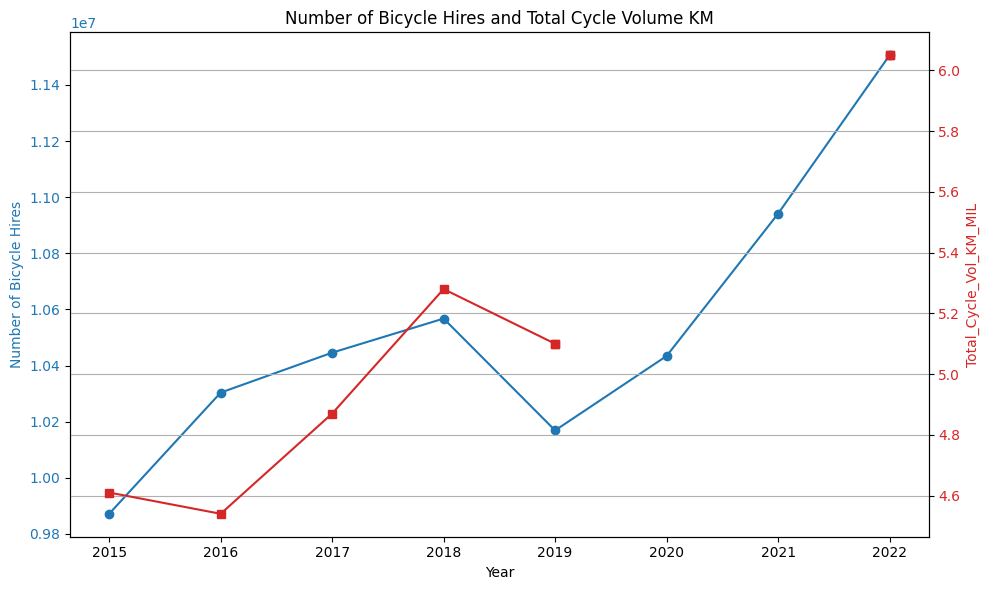

In [32]:
filtered_df = df[(df['Year'] >= 2015) & (df['Year'] < 2023)] 

years = filtered_df['Year']
bicycle_hires = filtered_df['Number of Bicycle Hires']

# Plotting the main line plot
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Bicycle Hires', color=color)
ax1.plot(years, bicycle_hires, marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating the secondary y-axis for London Total
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total_Cycle_Vol_KM_MIL', color=color)

# Fill missing values for 2020 and 2021 with interpolation
pedal_cycles = filtered_df['pedal_cycles'] 

# Splitting the data into parts
data_before_2020 = filtered_df[filtered_df['Year'] <= 2019]
data_between_2020_and_2022 = filtered_df[(filtered_df['Year'] >= 2019) & (filtered_df['Year'] <= 2022)]
data_after_2022 = filtered_df[filtered_df['Year'] >= 2022]

# Plotting each part with appropriate line styles
ax2.plot(data_before_2020['Year'], data_before_2020['London Total'], marker='s', linestyle='-', color=color)
ax2.plot(data_between_2020_and_2022['Year'], data_between_2020_and_2022['London Total'], marker='s', linestyle=':', color=color)
ax2.plot(data_after_2022['Year'], data_after_2022['London Total'], marker='s', linestyle='-', color=color)

ax2.tick_params(axis='y', labelcolor=color)

# Adding title, grid, and adjusting layout
plt.title('Number of Bicycle Hires and Total Cycle Volume KM')
plt.grid(True)
plt.tight_layout()
plt.show()

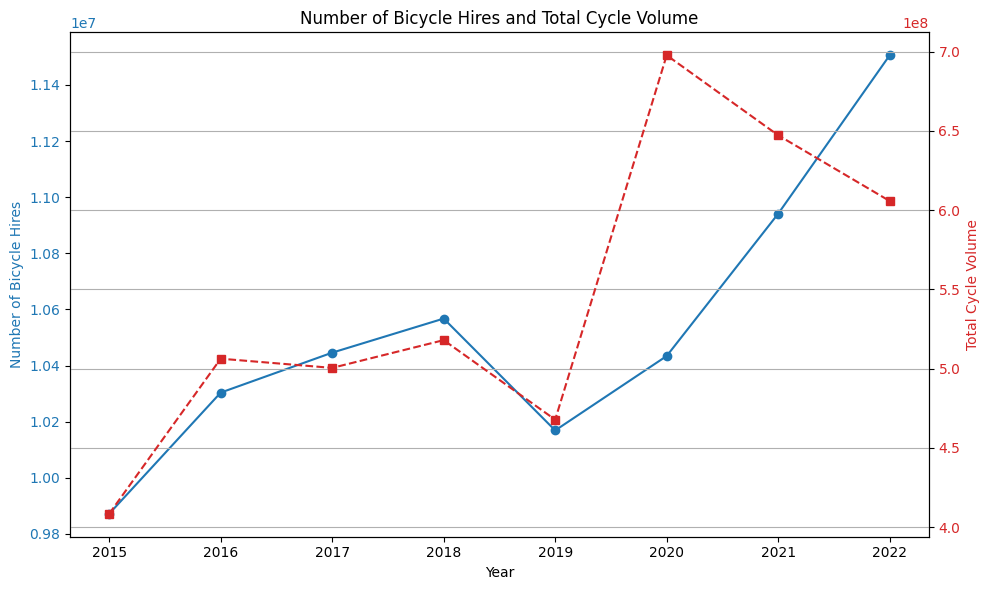

In [33]:
filtered_df = df[(df['Year'] >= 2015) & (df['Year'] < 2023)] 

years = filtered_df['Year']
bicycle_hires = filtered_df['Number of Bicycle Hires']

# Plotting the main line plot
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Bicycle Hires', color=color)
ax1.plot(years, bicycle_hires, marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)


Total = filtered_df['pedal_cycles']
# Creating the secondary y-axis for London Total
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Cycle Volume', color=color)
ax2.plot(years, Total, marker='s', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Adding title, grid, and adjusting layout
plt.title('Number of Bicycle Hires and Total Cycle Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

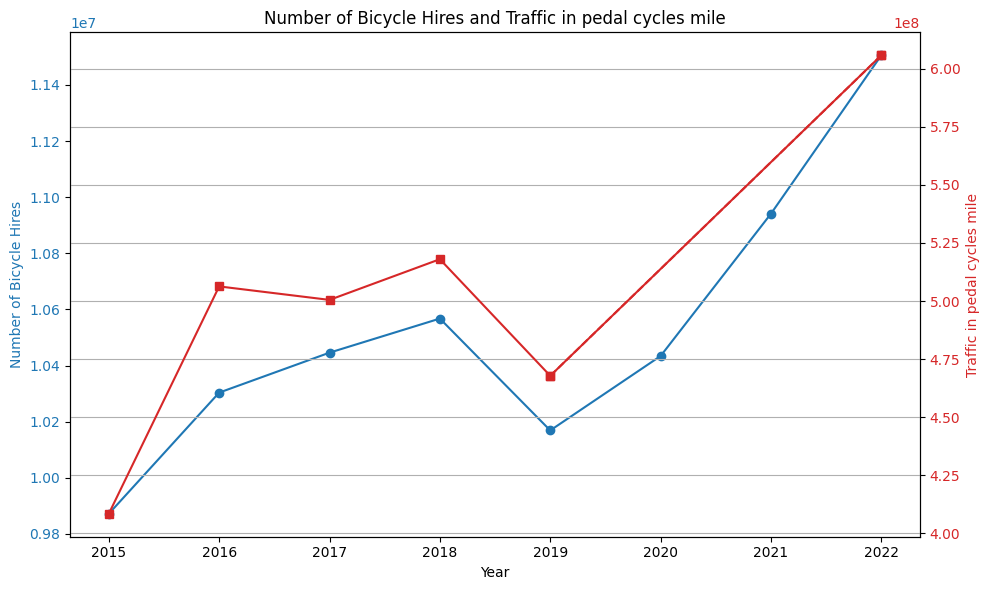

In [34]:
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Bicycle Hires', color=color)
ax1.plot(years, bicycle_hires, marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating the secondary y-axis for Traffic in pedal cycles mile
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Traffic in pedal cycles mile', color=color)

# Filtered data excluding 2020 and 2021
filtered_data = filtered_df[(filtered_df['Year'] < 2020) | (filtered_df['Year'] > 2021)]

# Plotting Total Cycle Volume with different line styles
ax2.plot(filtered_data['Year'], filtered_data['pedal_cycles'], marker='s', linestyle='-', color=color)  # Solid line for the whole data
ax2.plot(filtered_data['Year'][filtered_data['Year'].between(2019, 2022)], filtered_data['pedal_cycles'][filtered_data['Year'].between(2019, 2022)], marker='s', linestyle='--', color=color)  # Dotted line for 2019-2022
ax2.tick_params(axis='y', labelcolor=color)

# Adding title, grid, and adjusting layout
plt.title('Number of Bicycle Hires and Traffic in pedal cycles mile')
plt.grid(True)
plt.tight_layout()
plt.show()

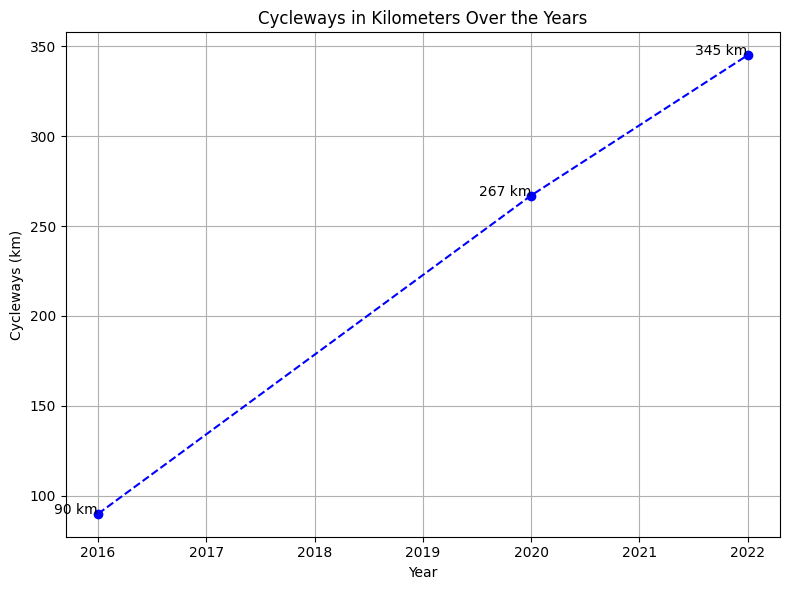

In [37]:
years = [2016, 2020, 2022]
cycle_ways_km = [90, 267, 345]

plt.figure(figsize=(8, 6))
plt.plot(years, cycle_ways_km, marker='o', linestyle='--', color='b')

# Title and labels
plt.title('Cycleways in Kilometers Over the Years')
plt.xlabel('Year')
plt.ylabel('Cycleways (km)')

# Adding data labels
for i in range(len(years)):
    plt.text(years[i], cycle_ways_km[i], f"{cycle_ways_km[i]} km", ha='right')

# Display plot
plt.grid(True)
plt.tight_layout()
plt.show()